# sympy.stats.Binomial


In [51]:
from ryPat import *

import sympy.stats as st

p= sm.symbols('p', positive=True, real=True)
n, k, x= sm.symbols('n, k, x', positive=True, integer=True)
X= st.Binomial('X',n,p)


In [52]:
N=    10
prob= 0.5

q= X.subs({n:N, p: prob})
q

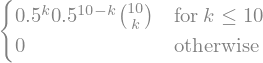

In [53]:
f= st.density(q)
f(k)

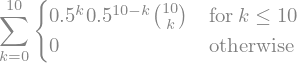

In [54]:
q= sm.Sum(
    f(k), 
    (k,0,N)
)
q

In [55]:
q.doit()

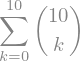

In [56]:
q= sm.Sum(
    sm.binomial(N,k),
    (k,0,N)
)
q

In [57]:
q.doit()

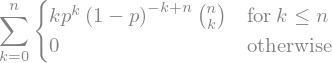

In [66]:
st.E(X).doit()

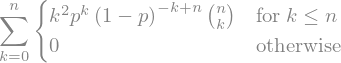

In [67]:
st.E(X**2).doit()

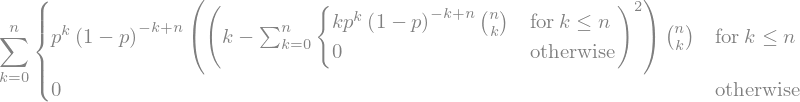

In [93]:
q= st.variance(X)
q

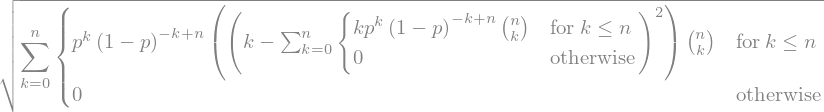

In [92]:
q= st.std(X)
q

In [113]:
# 不大好玩....

p= sm.symbols('p', positive=True, real=True)
n, k, x= sm.symbols('n, k, x', positive=True, integer=True)
X= st.Binomial('X',n,p)
f= st.density(X.subs({n:10, p:0.5}))

In [114]:
f

In [115]:
f.dict

<StemContainer object of 3 artists>

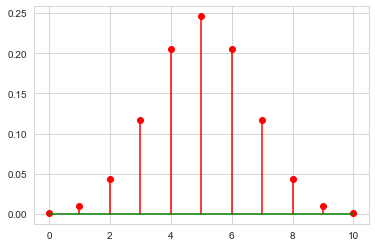

In [116]:
pl.stem(f.dict.keys(), f.dict.values())

In [117]:
# Poisson
λ= sm.symbols('λ', positive= True)
X= st.Poisson('X', lamda= λ)
X

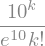

In [118]:
f= st.density(X.subs(λ, 10))
f(k)

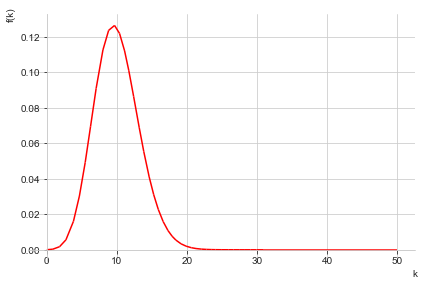

In [121]:
sm.plot(f(k),(k,0,50))

In [137]:
# 改回 matplotlib.pyplot ...
# 但有一些 衝突待解...

# 這一段進一步了解 sm.lambdify 的機制

import numpy as np
import matplotlib.pyplot as pl
import scipy.stats

xx= np.arange(0,50)
yy= sm.lambdify(x,f,  
                modules=['numpy',
                         'sympy',
                         #{'binomial':scipy.special.binom},
                         #{'PoissonDistribution':
                         #lambda x: scipy.stats.poisson.pmf(x, mu=10)
                         #}
                        ]
               )(xx)
pl.stem(xx,yy,'ro')
pl.grid()

# 老症狀
# NameError: name 'PoissonDistribution' is not defined


NameError: name 'PoissonDistribution' is not defined

In [ ]:
# 暫時離開 sympy.stats， 看來 這並非 sympy 的專長
# 還是回到 scipy.stats

# scipy.stats

- https://docs.scipy.org/doc/scipy/reference/stats.html

- 還是從 Binomial 切入
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom


In [146]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as pl

import scipy.stats as st


In [148]:
n= 10
k= np.arange(0, n+1)

q= sp.special.binom(n, k)
q

array([  1.,  10.,  45., 120., 210., 252., 210., 120.,  45.,  10.,   1.])

In [149]:
q.sum()

<StemContainer object of 3 artists>

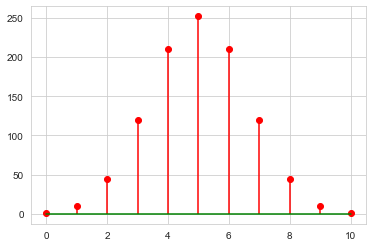

In [150]:
pl.stem(q)

In [152]:
def ryBinomPmf(k, n=10, p=0.5):
    y= p**k * (1-p)**(n-k) *  sp.special.binom(n, k)
    return y

ryBinomPmf(k)

array([0.00097656, 0.00976562, 0.04394531, 0.1171875 , 0.20507812,
       0.24609375, 0.20507812, 0.1171875 , 0.04394531, 0.00976562,
       0.00097656])

<StemContainer object of 3 artists>

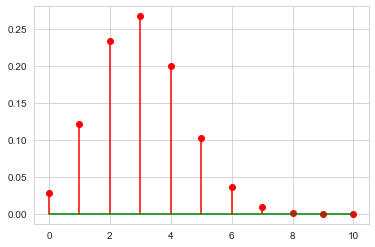

In [162]:
N=10
prob= 0.3
pl.stem(
    ryBinomPmf(
        k= np.arange(N+1), 
        n=N, p=prob
    )
)

# st.binom

In [205]:
N=    10
prob= 0.3
sampSize= 100

X= st.binom.rvs(n= N, p= prob, size= sampSize)
X

array([4, 6, 2, 3, 4, 2, 2, 7, 2, 4, 2, 4, 2, 4, 0, 3, 1, 3, 1, 3, 2, 3,
       2, 4, 4, 6, 3, 5, 5, 1, 4, 1, 3, 4, 3, 3, 2, 4, 4, 1, 5, 2, 1, 2,
       3, 2, 1, 3, 3, 2, 3, 3, 2, 2, 3, 4, 4, 3, 2, 3, 3, 5, 5, 4, 3, 1,
       3, 5, 1, 3, 3, 2, 4, 3, 3, 2, 4, 4, 4, 1, 2, 3, 6, 2, 4, 2, 3, 2,
       4, 5, 4, 1, 3, 3, 6, 3, 5, 2, 2, 2])

In [206]:
X.mean(), X.var()

In [207]:
μ, v= st.binom.stats(n, p)
μ, v

(array(5.), array(2.5))

array([2.82475249e-02, 1.21060821e-01, 2.33474440e-01, 2.66827932e-01,
       2.00120949e-01, 1.02919345e-01, 3.67569090e-02, 9.00169200e-03,
       1.44670050e-03, 1.37781000e-04, 5.90490000e-06])

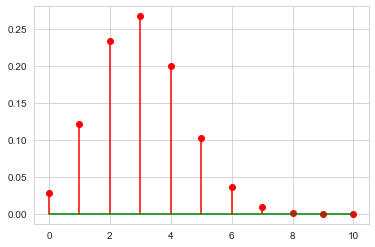

In [208]:
q= st.binom.pmf(k, n=N, p=prob)
pl.stem(q)
q

array([0.02824752, 0.14930835, 0.38278279, 0.64961072, 0.84973167,
       0.95265101, 0.98940792, 0.99840961, 0.99985631, 0.9999941 ,
       1.        ])

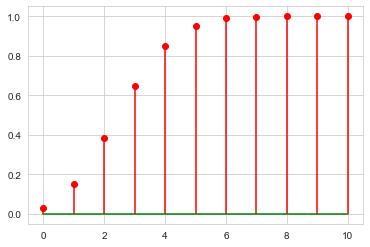

In [209]:
q= st.binom.cdf(k, n=N, p=prob)
pl.stem(q)
q

array([ 1.,  2.,  2.,  3.,  3.,  3.,  4.,  4.,  5., 10.])

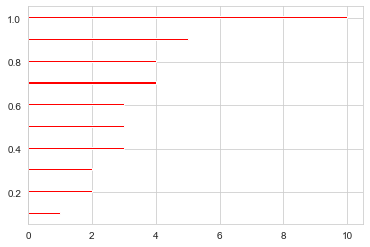

In [231]:
pp= np.linspace(.1,1,10)
kk= st.binom.ppf(pp, n=N, p=prob)
pl.barh(pp, kk, height= .01, align= 'edge')
kk

In [219]:
pl.bar?

Signature:
pl.bar(
    x,
    height,
    width=0.8,
    bottom=None,
    *,
    align='center',
    data=None,
    **kwargs,
)
Docstring:
Make a bar plot.

The bars are positioned at *x* with the given *align*\ment. Their
dimensions are given by *height* and *width*. The vertical baseline
is *bottom* (default 0).

Many parameters can take either a single value applying to all bars
or a sequence of values, one for each bar.

Parameters
----------
x : float or array-like
    The x coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

height : float or array-like
    The height(s) of the bars.

width : float or array-like, default: 0.8
    The width(s) of the bars.

bottom : float or array-like, default: 0
    The y coordinate(s) of the bars bases.

align : {'center', 'edge'}, default: 'center'
    Alignment of the bars to the *x* coordinates:

    - 'center': Center the base on the *x* positions.
    - 'edge': Align the left edges of the bars w

# Statistics (scipy.stats)
- https://docs.scipy.org/doc/scipy/tutorial/stats.html

- Introduction
- In this tutorial, we discuss many, but certainly not all, features of scipy.stats. The intention here is to provide a user with a working knowledge of this package. We refer to the reference manual for further details.
- 
- Note: This documentation is work in progress.
- 
- Discrete Statistical Distributions
- Continuous Statistical Distributions

In [406]:
import scipy.stats as st
N=    10
prob= 0.5
sampSize= 100

np.random.seed(0)
X= st.binom.rvs(n= N, p= prob, size= sampSize)
X

array([5, 6, 5, 5, 5, 6, 5, 7, 8, 5, 6, 5, 5, 7, 3, 3, 2, 7, 6, 7, 8, 6,
       5, 6, 3, 6, 3, 7, 5, 5, 4, 6, 5, 5, 2, 5, 5, 5, 7, 6, 4, 5, 6, 3,
       6, 6, 4, 3, 4, 4, 5, 5, 8, 3, 4, 3, 6, 4, 5, 4, 3, 3, 6, 3, 4, 4,
       6, 3, 7, 3, 8, 5, 8, 5, 6, 2, 4, 3, 4, 3, 4, 5, 3, 6, 5, 4, 5, 3,
       5, 7, 4, 6, 3, 6, 4, 4, 5, 2, 7, 1])

In [438]:
[
 (x, type(getattr(st.binom, x)))
 for x in dir(st.binom) 
 if not x.startswith('_')
]


[('a', int),
 ('b', float),
 ('badvalue', float),
 ('cdf', method),
 ('entropy', method),
 ('expect', method),
 ('extradoc', NoneType),
 ('freeze', method),
 ('generic_moment', method),
 ('inc', int),
 ('interval', method),
 ('isf', method),
 ('logcdf', method),
 ('logpmf', method),
 ('logsf', method),
 ('mean', method),
 ('median', method),
 ('moment', method),
 ('moment_tol', float),
 ('name', str),
 ('numargs', int),
 ('pmf', method),
 ('ppf', method),
 ('random_state', numpy.random.mtrand.RandomState),
 ('rvs', method),
 ('sf', method),
 ('shapes', str),
 ('stats', method),
 ('std', method),
 ('support', method),
 ('var', method),
 ('vecentropy', numpy.vectorize)]

In [ ]:
f= st.binom.pmf

In [280]:
# 這句有梗！！

# dir(st)
# isinstance()
# getattr(st, x)

import scipy.stats as st
dir(st)

['F_onewayBadInputSizesWarning',
 'F_onewayConstantInputWarning',
 'PearsonRConstantInputWarning',
 'PearsonRNearConstantInputWarning',
 'SpearmanRConstantInputWarning',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_hypotests',
 '_ksstats',
 '_multivariate',
 '_rvs_sampling',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 '_wilcoxon_data',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betabinom',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'brunnermunzel',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_c

In [282]:
# 列出所有 離散型 隨機變數
dist_discrete= [
    x 
    for x in dir(st) 
    if isinstance(
        getattr(st, x), 
        st.rv_discrete)
]

len(dist_discrete), dist_discrete

(16,
 ['bernoulli',
  'betabinom',
  'binom',
  'boltzmann',
  'dlaplace',
  'geom',
  'hypergeom',
  'logser',
  'nbinom',
  'nhypergeom',
  'planck',
  'poisson',
  'randint',
  'skellam',
  'yulesimon',
  'zipf'])

In [281]:
# 列出所有 連續型 隨機變數
dist_continuous= [
    x 
    for x in dir(st) 
    if isinstance(
        getattr(st, x), 
        st.rv_continuous)
]

len(dist_continuous), dist_continuous

(101,
 ['alpha',
  'anglit',
  'arcsine',
  'argus',
  'beta',
  'betaprime',
  'bradford',
  'burr',
  'burr12',
  'cauchy',
  'chi',
  'chi2',
  'cosine',
  'crystalball',
  'dgamma',
  'dweibull',
  'erlang',
  'expon',
  'exponnorm',
  'exponpow',
  'exponweib',
  'f',
  'fatiguelife',
  'fisk',
  'foldcauchy',
  'foldnorm',
  'gamma',
  'gausshyper',
  'genexpon',
  'genextreme',
  'gengamma',
  'genhalflogistic',
  'geninvgauss',
  'genlogistic',
  'gennorm',
  'genpareto',
  'gilbrat',
  'gompertz',
  'gumbel_l',
  'gumbel_r',
  'halfcauchy',
  'halfgennorm',
  'halflogistic',
  'halfnorm',
  'hypsecant',
  'invgamma',
  'invgauss',
  'invweibull',
  'johnsonsb',
  'johnsonsu',
  'kappa3',
  'kappa4',
  'ksone',
  'kstwo',
  'kstwobign',
  'laplace',
  'laplace_asymmetric',
  'levy',
  'levy_l',
  'levy_stable',
  'loggamma',
  'logistic',
  'loglaplace',
  'lognorm',
  'loguniform',
  'lomax',
  'maxwell',
  'mielke',
  'moyal',
  'nakagami',
  'ncf',
  'nct',
  'ncx2',
  'norm

In [400]:
#st.rv_histogram?
'''
[(x,
  getattr(st.rv_continuous,x),
  print(getattr(st.rv_continuous,x).__doc__)
 )
 
 for x in dir(st.rv_continuous) 
 if not x.startswith('_')]
'''
q= np.ndarray
def ryGetAttr(className):
    q= className
    for n, x in enumerate(dir(q)): 
        if not x.startswith('_'):
            y= getattr(q, x)
            z= y.__doc__
            print(f'''
            {'='*40}
            n= {n}
            x= {x}
            y= {y}
            {'-'*40}
            z= {z}
            ''')

        


            n= 25
            x= accumulate
            y= <built-in method accumulate of numpy.ufunc object at 0x000001DBBFBE9400>
            ----------------------------------------
            z= accumulate(array, axis=0, dtype=None, out=None)

    Accumulate the result of applying the operator to all elements.

    For a one-dimensional array, accumulate produces results equivalent to::

      r = np.empty(len(A))
      t = op.identity        # op = the ufunc being applied to A's  elements
      for i in range(len(A)):
          t = op(t, A[i])
          r[i] = t
      return r

    For example, add.accumulate() is equivalent to np.cumsum().

    For a multi-dimensional array, accumulate is applied along only one
    axis (axis zero by default; see Examples below) so repeated use is
    necessary if one wants to accumulate over multiple axes.

    Parameters
    ----------
    array : array_like
        The array to act on.
    axis : int, optional
        The axis along which to

<method-wrapper '__str__' of binom_gen object at 0x000001DBC18155E0>

In [1]:
import scipy.special as sc


In [7]:
#sc.gammainc??
import inspect
sc.xlogy??

Call signature:  sc.xlogy(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'xlogy'>
File:            m:\programdata\anaconda3\lib\site-packages\numpy\__init__.py
Docstring:      
xlogy(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

xlogy(x, y)

Compute ``x*log(y)`` so that the result is 0 if ``x = 0``.

Parameters
----------
x : array_like
    Multiplier
y : array_like
    Argument

Returns
-------
z : array_like
    Computed x*log(y)

Notes
-----

.. versionadded:: 0.13.0
Class docstring:
Functions that operate element by element on whole arrays.

To see the documentation for a specific ufunc, use `info`.  For
example, ``np.info(np.sin)``.  Because ufuncs are written in C
(for speed) and linked into Python with NumPy's ufunc facility,
Python's help() function finds this page whenever help() is called
on a ufunc.

A detailed explanation of ufuncs can be found in the docs for :ref:`ufuncs`.

**Calling ufun

In [9]:
#sc.bdtr?
inspect.getsource(sc.bdtr)

TypeError: module, class, method, function, traceback, frame, or code object was expected, got ufunc

In [11]:
import numpy as np
np.random.RandomState?

Init signature: np.random.RandomState(self, /, *args, **kwargs)
Docstring:     
RandomState(seed=None)

Container for the slow Mersenne Twister pseudo-random number generator.
Consider using a different BitGenerator with the Generator container
instead.

`RandomState` and `Generator` expose a number of methods for generating
random numbers drawn from a variety of probability distributions. In
addition to the distribution-specific arguments, each method takes a
keyword argument `size` that defaults to ``None``. If `size` is ``None``,
then a single value is generated and returned. If `size` is an integer,
then a 1-D array filled with generated values is returned. If `size` is a
tuple, then an array with that shape is filled and returned.

**Compatibility Guarantee**

A fixed bit generator using a fixed seed and a fixed series of calls to
'RandomState' methods using the same parameters will always produce the
same results up to roundoff error except when the values were incorrect.
`Random

In [12]:
np.random.Generator?

Init signature: np.random.Generator(self, /, *args, **kwargs)
Docstring:     
Generator(bit_generator)

Container for the BitGenerators.

``Generator`` exposes a number of methods for generating random
numbers drawn from a variety of probability distributions. In addition to
the distribution-specific arguments, each method takes a keyword argument
`size` that defaults to ``None``. If `size` is ``None``, then a single
value is generated and returned. If `size` is an integer, then a 1-D
array filled with generated values is returned. If `size` is a tuple,
then an array with that shape is filled and returned.

The function :func:`numpy.random.default_rng` will instantiate
a `Generator` with numpy's default `BitGenerator`.

**No Compatibility Guarantee**

``Generator`` does not provide a version compatibility guarantee. In
particular, as better algorithms evolve the bit stream may change.

Parameters
----------
bit_generator : BitGenerator
    BitGenerator to use as the core generator.

No

In [13]:
np.random?

Type:        module
String form: <module 'numpy.random' from 'M:\\ProgramData\\Anaconda3\\lib\\site-packages\\numpy\\random\\__init__.py'>
File:        m:\programdata\anaconda3\lib\site-packages\numpy\random\__init__.py
Docstring:  
Random Number Generation

Use ``default_rng()`` to create a `Generator` and call its methods.

=============== =========================================================
Generator
--------------- ---------------------------------------------------------
Generator       Class implementing all of the random number distributions
default_rng     Default constructor for ``Generator``
=============== =========================================================

============================================= ===
BitGenerator Streams that work with Generator
--------------------------------------------- ---
MT19937
PCG64
Philox
SFC64
============================================= ===

============================================= ===
Getting entropy to initialize a BitGe